# Comparison between variant annotation databases

Created: **31/07/18**  
Last modified: **07/08/18**

**Goal:** ...  
See [`doc/biblio/variant_annotation_databases.md`](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md) for detailed documentation of all these databases.
We will study different databases available online and compare them with OncoKB:
* [CIViC](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#civic)
* [Cancer Genome Interpreter](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#cancer-genome-interpreter)
* [Precision Medicine Knowledgebase](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#precision-medicine-knowledgebase) (couldn't finish)
* [CanDL](https://github.com/ElsaB/impact-annotator/blob/master/doc/biblio/variant_annotation_databases.md#candl)

This notebook is divided in ? parts:

* **1. Bla**: Bla

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CIViC" data-toc-modified-id="CIViC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CIViC</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Cancer-Genome-Interpreter" data-toc-modified-id="Cancer-Genome-Interpreter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cancer Genome Interpreter</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Precision-Medicine-Knowledgebase" data-toc-modified-id="Precision-Medicine-Knowledgebase-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Precision Medicine Knowledgebase</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get the raw data</a></span></li></ul></li><li><span><a href="#CanDL" data-toc-modified-id="CanDL-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CanDL</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Study-unexpected-annotated-mutations" data-toc-modified-id="Study-unexpected-annotated-mutations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Study unexpected annotated mutations</a></span><ul class="toc-item"><li><span><a href="#At-the-row-level" data-toc-modified-id="At-the-row-level-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>At the row level</a></span></li><li><span><a href="#At-the-key-level" data-toc-modified-id="At-the-key-level-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>At the key level</a></span></li></ul></li><li><span><a href="#Study-shared-genes-and-variants" data-toc-modified-id="Study-shared-genes-and-variants-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Study shared genes and variants</a></span><ul class="toc-item"><li><span><a href="#Correct-Hugo-symbols" data-toc-modified-id="Correct-Hugo-symbols-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Correct Hugo symbols</a></span></li><li><span><a href="#Study-genes-sharing" data-toc-modified-id="Study-genes-sharing-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Study genes sharing</a></span></li></ul></li></ul></div>

***

In [1]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [2]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact <- add_features("../../../data/", impact, oncokb = TRUE)

We will only work with the curated mutations:

In [3]:
impact <- impact[impact$confidence_class %in% c("AUTO_OK", "MANUAL_OK"),] # keep only the somatic mutations

We will use the following data frame to keep track of the putative drivers not found in OncoKB but found in other databases:

In [4]:
unexpected_annotated_mutations <- data.frame()

## CIViC

### Get the raw data

Data downloaded from https://civicdb.org/releases under "Variant Summaries", 01/07/18 version.

In [5]:
civic <- read.table("../../../data/other_databases/CIViC_01-Jul-2018-VariantSummaries.tsv",
                    sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [6]:
nrow(civic)
length(unique(civic$gene))
colnames(civic)

[1] 1885

[1] 353

[1] "variant_id"                 "variant_civic_url"         
 [3] "gene"                       "entrez_id"                 
 [5] "variant"                    "summary"                   
 [7] "variant_groups"             "chromosome"                
 [9] "start"                      "stop"                      
[11] "reference_bases"            "variant_bases"             
[13] "representative_transcript"  "ensembl_version"           
[15] "reference_build"            "chromosome2"               
[17] "start2"                     "stop2"                     
[19] "representative_transcript2" "variant_types"             
[21] "hgvs_expressions"           "last_review_date"          
[23] "civic_actionability_score"

In [7]:
interesting_columns <- c(
"gene",
"variant",
"chromosome",
"start",
"stop",
"reference_bases",
"variant_bases",
"representative_transcript",
"ensembl_version",
"reference_build",
"variant_types",
"hgvs_expressions",
"civic_actionability_score")

head(civic[, interesting_columns], 10)

gene,variant,chromosome,start,stop,reference_bases,variant_bases,representative_transcript,ensembl_version,reference_build,variant_types,hgvs_expressions,civic_actionability_score
ABL1,BCR-ABL,22,23522397,23632600,,,ENST00000305877.8,75,GRCh37,transcript_fusion,,238.0
ABL1,BCR-ABL T334I,9,133748283,133748283,C,T,ENST00000372348.2,75,GRCh37,"transcript_fusion,missense_variant","NM_007313.2:c.1001C>T,NP_005148.2:p.Thr315Ile,ENST00000372348.2:c.1001C>T,NC_000009.11:g.133748283C>T",54.0
ABL1,BCR-ABL E255K,9,133738363,133738363,G,A,ENST00000318560.5,75,GRCh37,"transcript_fusion,missense_variant","NC_000009.11:g.133738363G>A,NM_005157.5:c.763G>A,NP_005148.2:p.Glu255Lys,ENST00000318560.5:c.763G>A",17.0
AKT1,E17K,14,105246551,105246551,C,T,ENST00000407796.2,75,GRCh37,missense_variant,"NC_000014.8:g.105246551C>T,NM_001014432.1:c.49G>A,NP_001014432.1:p.Glu17Lys,ENST00000407796.2:c.49G>A",32.5
ALK,EML4-ALK,2,42396490,42522656,,,ENST00000318522.5,75,GRCh37,transcript_fusion,,48.0
ALK,EML4-ALK C1156Y,2,29445258,29445258,C,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3467G>A,NC_000002.11:g.29445258C>T,NM_004304.4:c.3467G>A,NP_004295.2:p.Cys1156Tyr",19.0
ALK,EML4-ALK L1196M,2,29443631,29443631,G,T,ENST00000389048.3,75,GRCh37,"transcript_fusion,missense_variant","ENST00000389048.3:c.3586C>A,NC_000002.11:g.29443631G>T,NM_004304.4:c.3586C>A,NP_004295.2:p.Leu1196Met",31.0
ALK,F1174L,2,29443695,29443695,G,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3522C>A,NP_004295.2:p.Phe1174Leu,NC_000002.11:g.29443695G>T,ENST00000389048.3:c.3522C>A",33.5
ALK,R1275Q,2,29432664,29432664,C,T,ENST00000389048.3,75,GRCh37,missense_variant,"NM_004304.4:c.3824G>A,NP_004295.2:p.Arg1275Gln,NC_000002.11:g.29432664C>T,ENST00000389048.3:c.3824G>A",23.0
ARAF,S214C,X,47426121,47426121,C,G,ENST00000377045.4,75,GRCh37,missense_variant,"NC_000023.10:g.47426121C>G,NM_001654.4:c.641C>G,NP_001645.1:p.Ser214Cys,ENST00000377045.4:c.641C>G",11.0


### Create keys to join the two dataframes and extract the features

We will join the database using the following keys: 
* `mut_key` for `impact`
* `chromosome`\_`start`_`reference_bases`_`variant_bases` for `civic`

In [8]:
civic$join_key <- paste(civic$chromosome, civic$start, civic$reference_bases, civic$variant_bases, sep = "_")

# sometimes we can't find a key
civic$join_key[civic$chromosome == "" |
               civic$start == "" |
               (civic$reference_bases == "" & civic$variant_bases   == "")] <- "no_key"

In [9]:
print_count_and_proportion(civic[civic$join_key == "no_key",], civic)

# delete the rows where we couldn't find a key
civic <- civic[civic$join_key != "no_key",]

[1] "1082 over 1885 (57.40%)"

**Verification 1** The `join_key` are not unique:

In [10]:
length(unique(civic$join_key))
nrow(civic)

[1] 797

[1] 803

In [11]:
# make them unique
civic <- unique(civic[, c("gene", "chromosome", "start", "stop", "reference_bases", "variant_bases", "join_key")])

length(unique(civic$join_key))
nrow(civic)

[1] 797

[1] 797

**Verification 2** not every impact `mut_key` has an analoguous `join_key` in `civic`.

In [12]:
impact$is_in_civic <- "no"
impact$is_in_civic[impact$mut_key %in% civic$join_key] <- "yes"

### Results


    no    yes 
174423  12675 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                438                 311               45583               15907 
Predicted Oncogenic             Unknown 
               2731              122128 

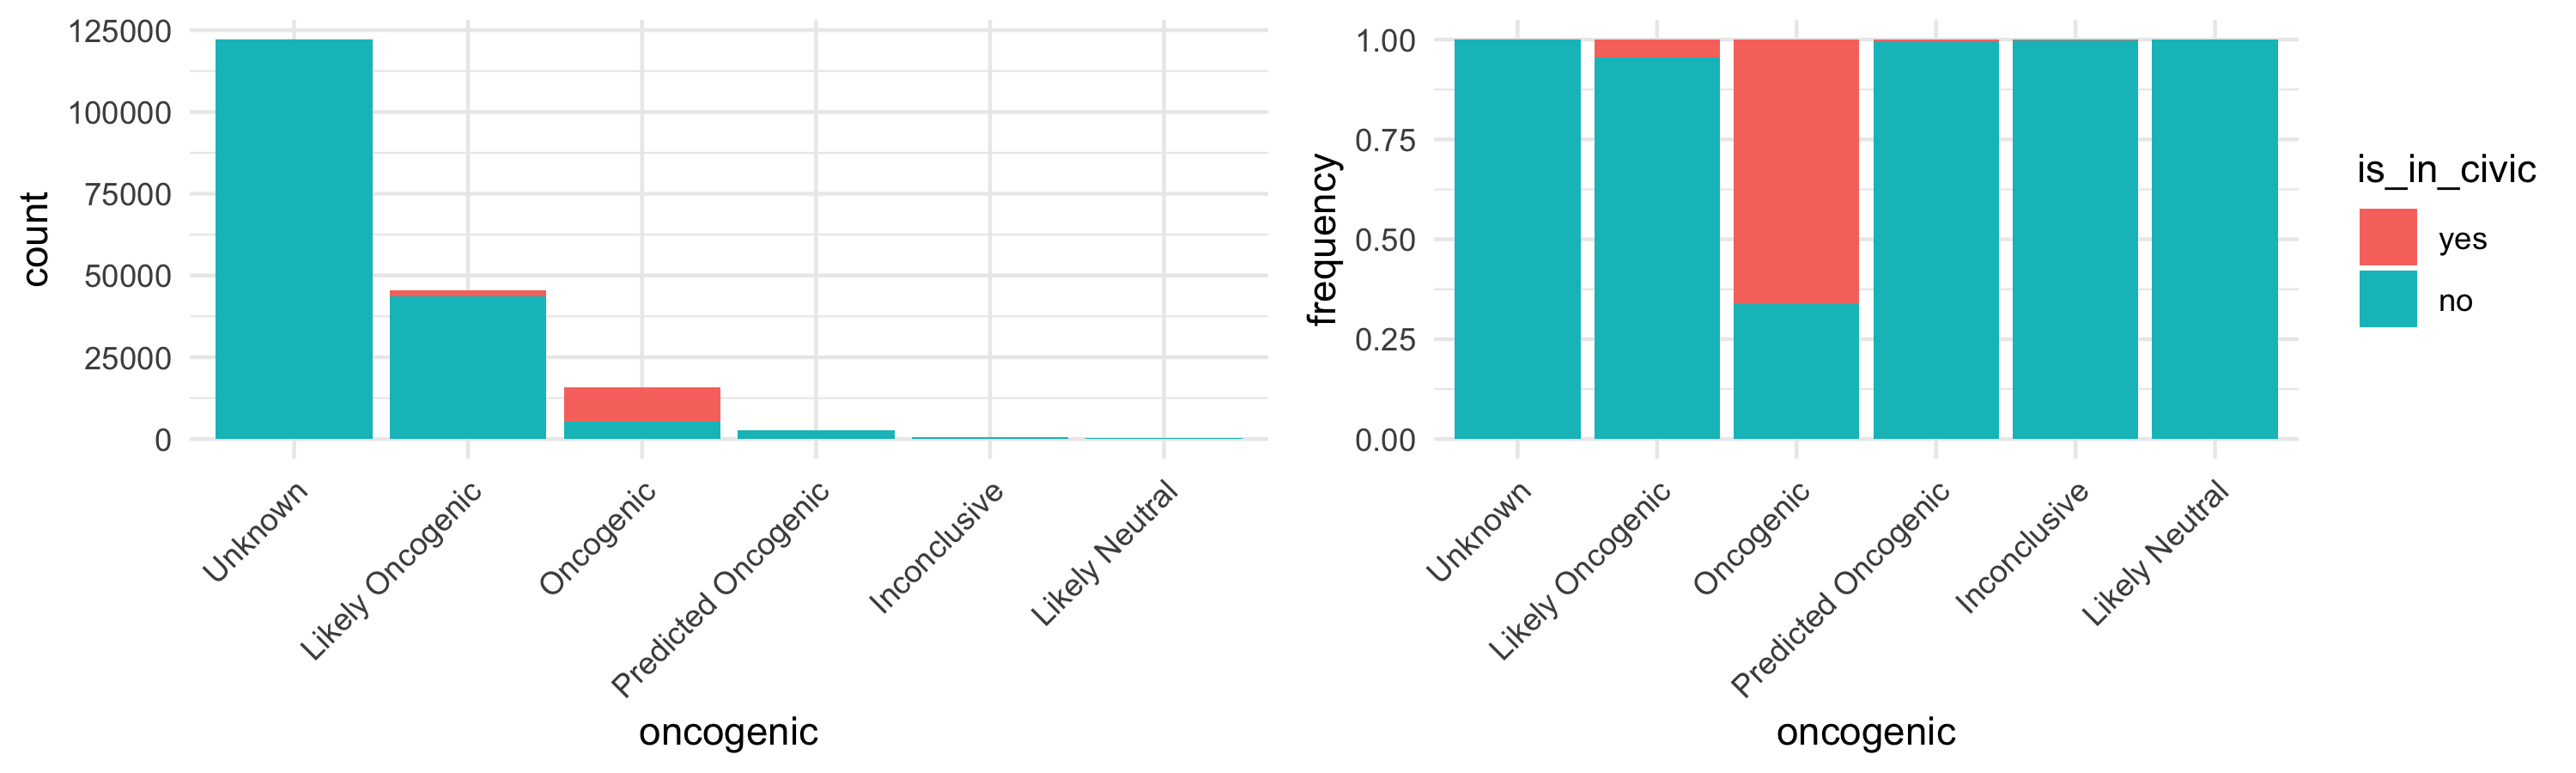

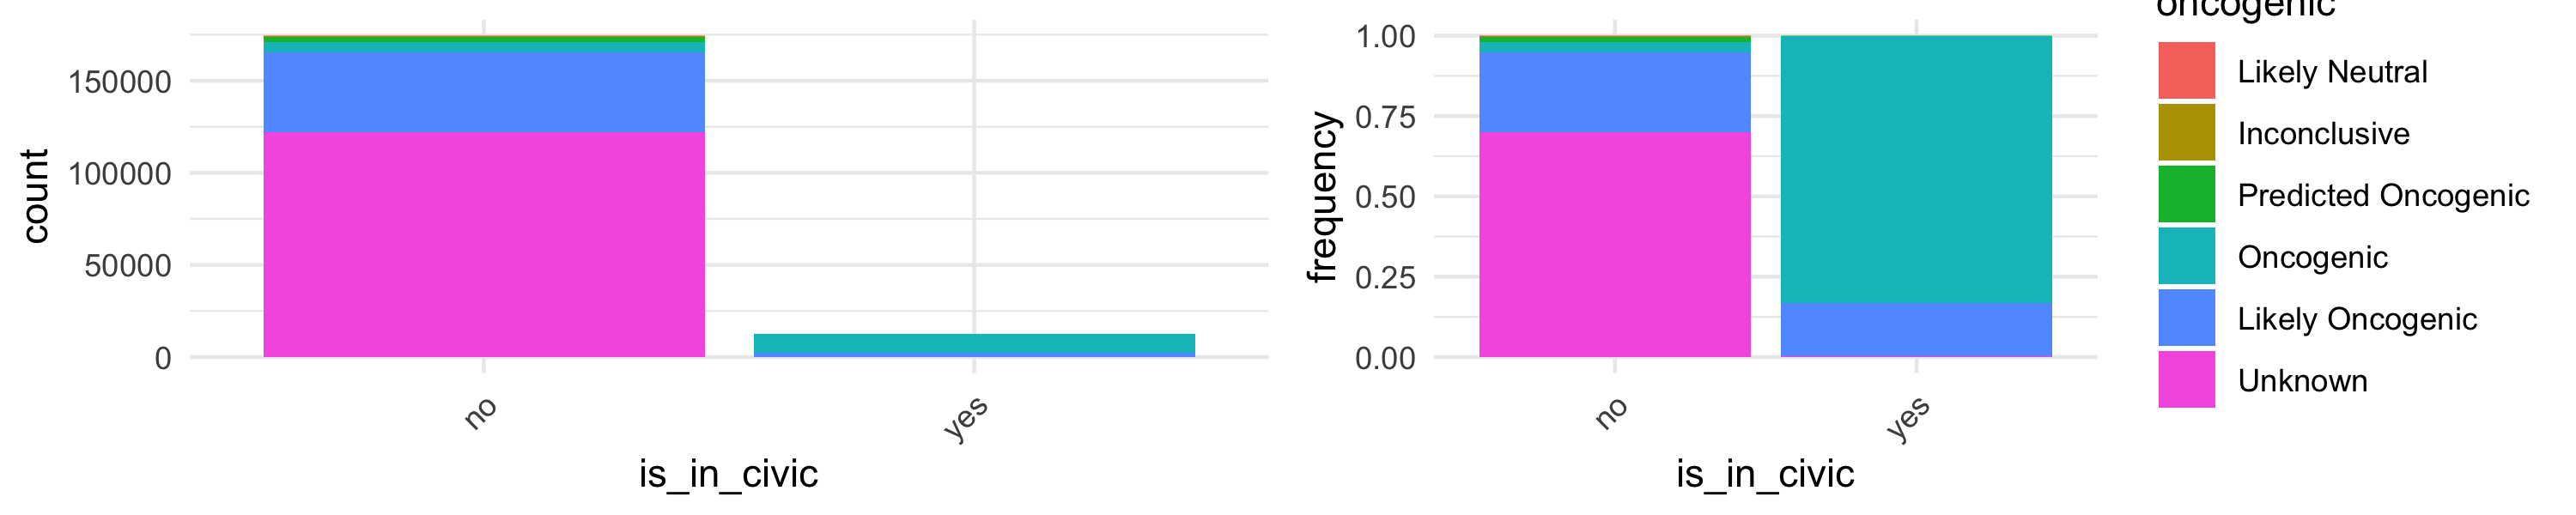

In [13]:
table(impact$is_in_civic)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_civic", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_civic", "oncogenic", 10, 2)

Putative drivers not found in OncoKB:

In [14]:
drivers_not_found <- impact[impact$is_in_civic == "yes" &
                            ! impact$oncogenic %in% c("Oncogenic", "Likely Oncogenic", "Predicted Oncogenic"),]
nrow(drivers_not_found)

# only keep the original impact columns
drivers_not_found <- drivers_not_found[1:29]
drivers_not_found$database <- "civic"

unexpected_annotated_mutations <- rbind(unexpected_annotated_mutations, drivers_not_found)

[1] 51

## Cancer Genome Interpreter

### Get the raw data

Data downloaded from https://www.cancergenomeinterpreter.org/mutations, 01/17/18 version.

In [15]:
cgi <- read.table("../../../data/other_databases/CGI_catalog_of_validated_oncogenic_mutations.tsv",
                  sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [16]:
nrow(cgi)
length(unique(cgi$gene))
colnames(cgi)

[1] 5601

[1] 247

[1] "gene"           "gdna"           "protein"        "transcript"    
[5] "info"           "context"        "cancer_acronym" "source"        
[9] "reference"

In [17]:
head(cgi, 10)

gene,gdna,protein,transcript,info,context,cancer_acronym,source,reference
ABCB4,chr7:g.87053221C>T,.,ENST00000265723,CSQN=SpliceDonorSNV;C2=SpliceDonorOfExon17_At_chr7:87053221;aliases=ENSP00000265723;source=Ensembl,germline,HC-PR,ClinVar,Clinvar:NM_018849.2(ABCB4):c.2211+1G>A AND Progressive familial intrahepatic cholestasis 3
ABL1,chr9:g.133738306G>A,p.E236K,ENST00000318560,CSQN=Missense;codon_pos=133738306-133738307-133738308;ref_codon_seq=GAG;aliases=ENSP00000323315;source=Ensembl,somatic,CML,DoCM,PMID:21562040
ABL1,chr9:g.133738309A>G,p.M237V,ENST00000318560,"CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738309_133738311delATGinsGTA,chr9:g.133738309_133738311delATGinsGTC,chr9:g.133738309_133738311delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738325T>C,p.I242T,ENST00000318560,"CSQN=Missense;reference_codon=ATC;candidate_codons=ACA,ACG,ACT,ACC;candidate_mnv_variants=chr9:g.133738325_133738326delTCinsCA,chr9:g.133738325_133738326delTCinsCG,chr9:g.133738325_133738326delTCinsCT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738330A>G,p.M244V,ENST00000318560,"CSQN=Missense;codon_pos=133738330-133738331-133738332;ref_codon_seq=ATG;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;reference_codon=ATG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738330_133738332delATGinsGTA,chr9:g.133738330_133738332delATGinsGTC,chr9:g.133738330_133738332delATGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:20367437__PMID:21895409__PMID:25157968__PMID:12399961__PMID:12576318__PMID:23676790__PMID:18223278__PMID:12623848__PMID:21888027
ABL1,chr9:g.133738340A>G,p.K247R,ENST00000318560,"CSQN=Missense;reference_codon=AAG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_mnv_variants=chr9:g.133738340_133738341delAGinsGA,chr9:g.133738339_133738340delAAinsCG,chr9:g.133738339_133738341delAAGinsCGA,chr9:g.133738339_133738341delAAGinsCGC,chr9:g.133738339_133738341delAAGinsCGT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738342C>G,p.L248V,ENST00000318560,"CSQN=Missense;codon_pos=133738342-133738343-133738344;ref_codon_seq=CTG;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;reference_codon=CTG;candidate_codons=GTA,GTC,GTG,GTT;candidate_mnv_variants=chr9:g.133738342_133738344delCTGinsGTA,chr9:g.133738342_133738344delCTGinsGTC,chr9:g.133738342_133738344delCTGinsGTT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:18354488__PMID:20367437__PMID:25157968__PMID:21221851__PMID:17008892__PMID:12623848
ABL1,chr9:g.133738348G>A,p.G250R,ENST00000318560,"CSQN=Missense;reference_codon=GGG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_snv_variants=chr9:g.133738348G>C;candidate_mnv_variants=chr9:g.133738348_133738350delGGGinsAGA,chr9:g.133738348_133738350delGGGinsCGA,chr9:g.133738348_133738350delGGGinsCGC,chr9:g.133738348_133738350delGGGinsCGT;aliases=ENSP00000323315;source=Ensembl",somatic,CML,Biomarker,PMID:21562040
ABL1,chr9:g.133738349G>A,p.G250E,ENST00000318560,"CSQN=Missense;reference_codon=GGG;candidate_codons=GAG,GAA;candidate_mnv_variants=chr9:g.133738349_133738350delGGinsAA;aliases=ENSP00000323315;source=Ensembl__CSQN=Missense;codon_pos=133738348-133738349-133738350;ref_codon_seq=GGG;aliases=ENSP00000323315;source=Ensembl",somatic,CML,DoCM__Biomarker__OncoKB,PMID:21562040__PMID:21505103__PMID:20367437__PMID:21895409__PMID:22870928__PMID:25157968__PMID:11964322__PMID:23676790__PMID:12623848
ABL1,chr9:g.133738355A>G,p.Q252R,ENST00000318560,"CSQN=Missense;reference_codon=CAG;candidate_codons=AGG,AGA,CGA,CGC,CGG,CGT;candidate_mnv_variants=chr9:g.133738354_133738355delCAinsAG,chr9:g.133738355_133738356delAGinsGA,chr9:g.133738355_133738356delAGinsGC,chr9:g.133738355_133738356delAGinsGT,chr9:g.133738354_133738356delCAGinsAGA;aliases=ENSP

### Create keys to join the two dataframes and extract the features

We will join the database using the following keys: 
* `Hugo_Symbol`.`HGVSp_Short` for `impact`
* `gene`.`protein` for `cgi`

In [18]:
impact$cgi_key <- paste0(impact$Hugo_Symbol, '.', impact$HGVSp_Short)
head(impact$cgi_key)

[1] "TP53.p.T256P"   "PIK3R3.p.I298M" "ATR.p.R2431M"   "PDGFRA.p.L465M"
[5] "FBXW7."         "FBXW7.p.G61*"

In [19]:
cgi$join_key <- paste0(cgi$gene, '.', cgi$protein)
head(cgi$join_key)

[1] "ABCB4.."      "ABL1.p.E236K" "ABL1.p.M237V" "ABL1.p.I242T" "ABL1.p.M244V"
[6] "ABL1.p.K247R"

**Verification 1** The `join_key` are not unique:

In [20]:
length(unique(cgi$join_key))
nrow(cgi)

[1] 5232

[1] 5601

In [21]:
# make them unique
cgi <- unique(cgi[, c("gene", "protein", "join_key")])

length(unique(cgi$join_key))
nrow(cgi)

[1] 5232

[1] 5232

**Verification 2** not every impact `cgi_key` has an analoguous `join_key` in `cgi`.

In [22]:
impact$is_in_cgi <- "no"
impact$is_in_cgi[impact$cgi_key %in% cgi$join_key] <- "yes"

### Results


    no    yes 
163637  23461 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                438                 311               45583               15907 
Predicted Oncogenic             Unknown 
               2731              122128 

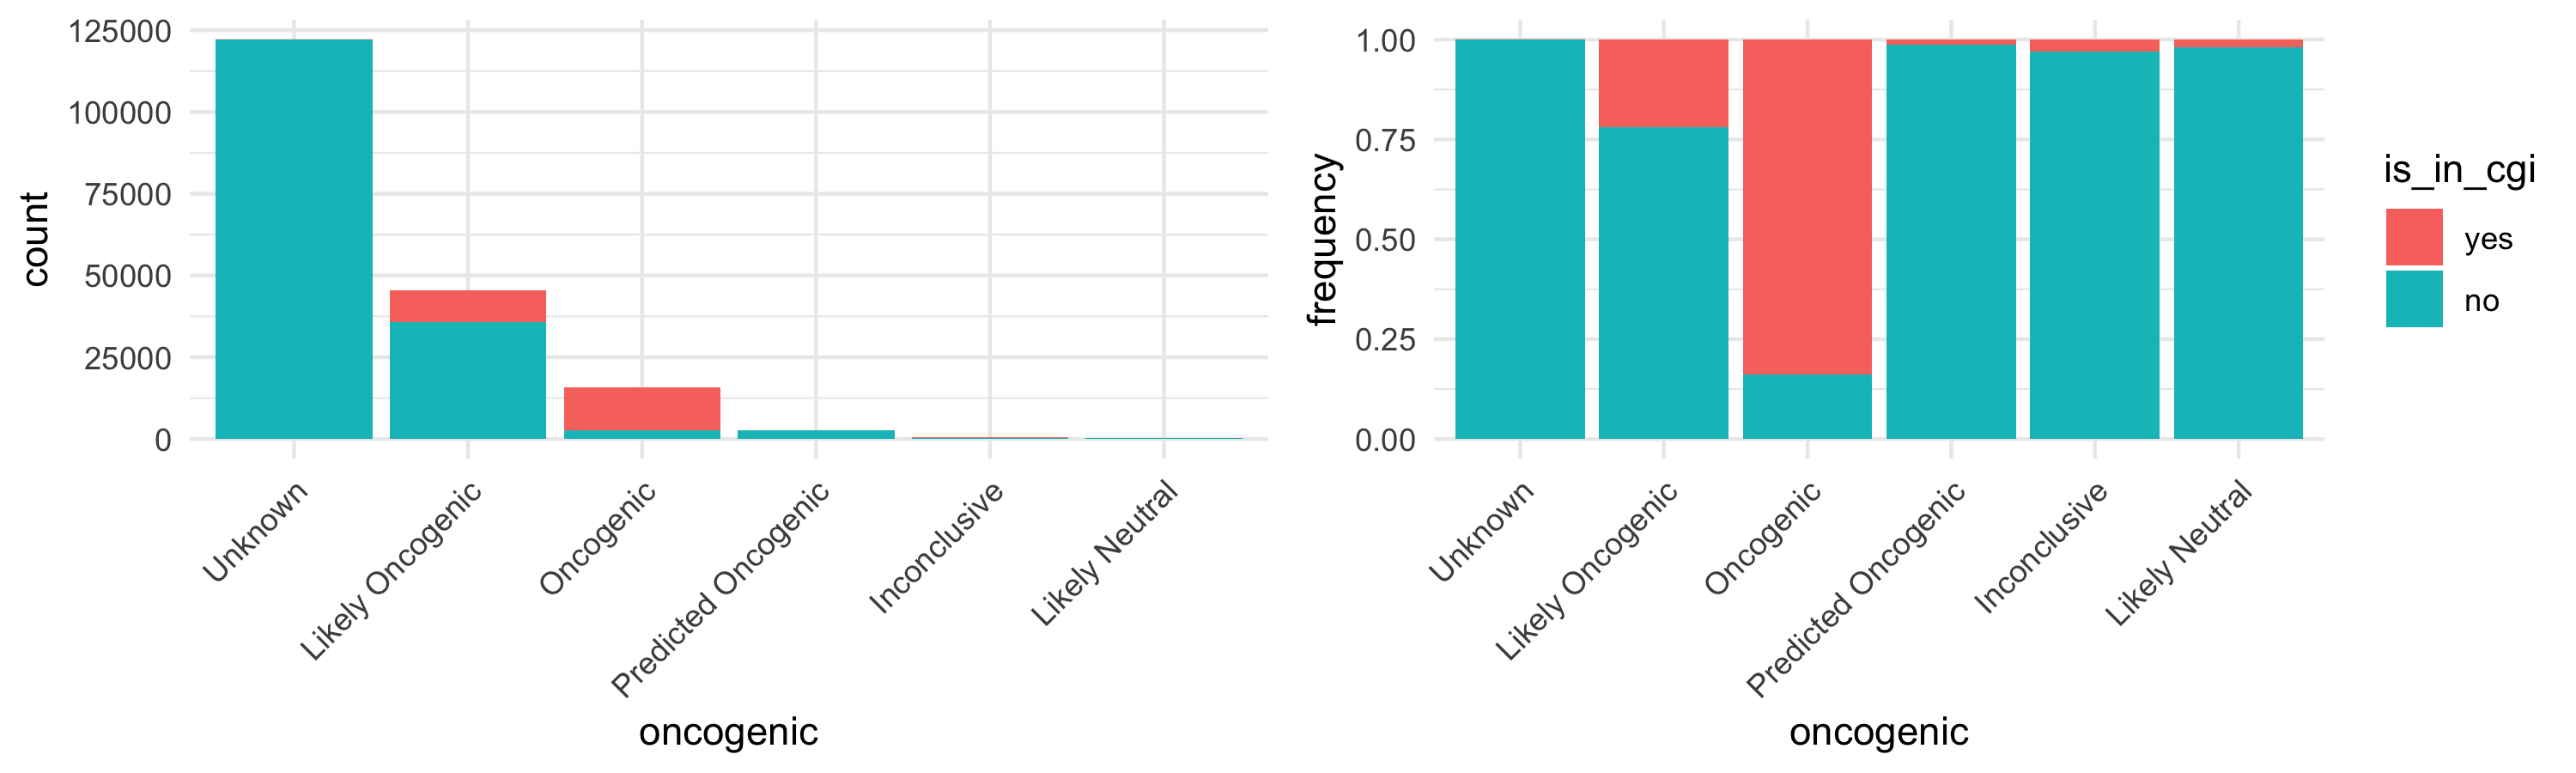

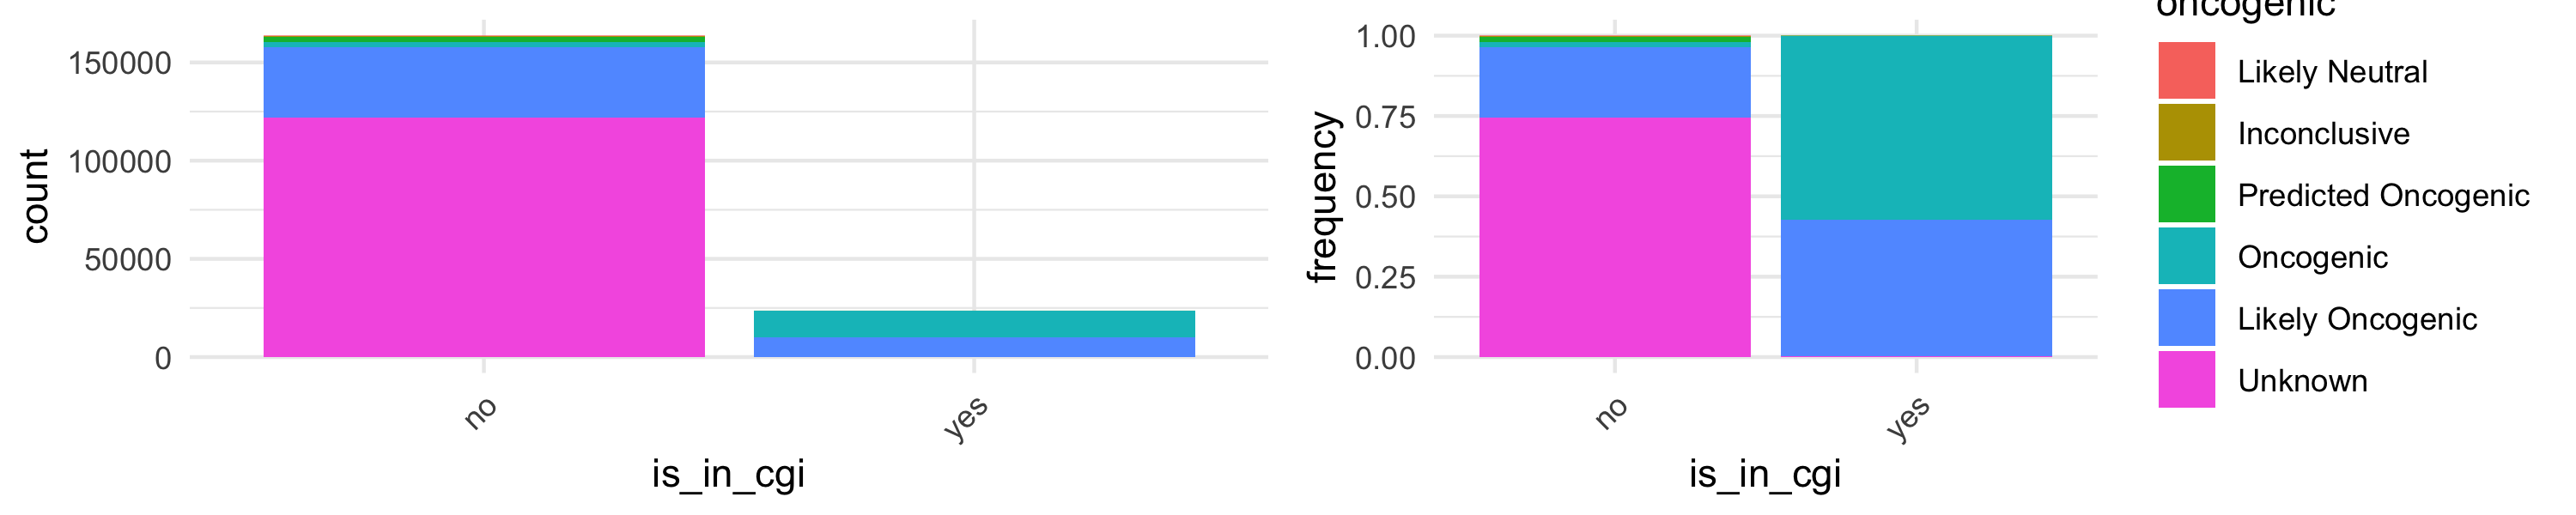

In [23]:
table(impact$is_in_cgi)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_cgi", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_cgi", "oncogenic", 10, 2)

Putative drivers not found in OncoKB:

In [24]:
drivers_not_found <- impact[impact$is_in_cgi == "yes" &
                            ! impact$oncogenic %in% c("Oncogenic", "Likely Oncogenic", "Predicted Oncogenic"),]
nrow(drivers_not_found)

# only keep the original impact columns
drivers_not_found <- drivers_not_found[1:29]
drivers_not_found$database <- "cgi"

unexpected_annotated_mutations <- rbind(unexpected_annotated_mutations, drivers_not_found)

[1] 105

## Precision Medicine Knowledgebase

### Get the raw data

Data downloaded from https://pmkb.weill.cornell.edu under "Welcome to Precision Medicine Knowledgebase", 02/08/18 version.

In [25]:
# the downladed data has format .xlsx
install.packages("readxl", repos = "http://cran.us.r-project.org")
library("readxl")


The downloaded binary packages are in
	/var/folders/8z/vf8s7np51tv6fpjv6yqvtdn93zds34/T//Rtmp263UdC/downloaded_packages


In [26]:
pmk <- read_excel("../../../data/other_databases/PMK_IPM_Knowledgebase_Interpretations_Complete_20180807-1922.xlsx")

In [27]:
nrow(pmk)
length(unique(pmk$Gene))
colnames(pmk)

[1] 553

[1] 153

[1] "Gene"            "Tumor Type(s)"   "Tissue Type(s)"  "Variant(s)"     
 [5] "Tier"            "Interpretations" "Citations"       "X__1"           
 [9] "X__2"            "X__3"            "X__4"            "X__5"           
[13] "X__6"            "X__7"            "X__8"            "X__9"           
[17] "X__10"           "X__11"           "X__12"           "X__13"          
[21] "X__14"           "X__15"           "X__16"           "X__17"          
[25] "X__18"           "X__19"           "X__20"

In [28]:
interesting_columns <- c(
"Gene",
"Tumor Type(s)",
"Tissue Type(s)",
"Variant(s)",
"Tier")

head(pmk[, interesting_columns], 10)

Gene,Tumor Type(s),Tissue Type(s),Variant(s),Tier
CSF3R,"Atypical Chronic Myeloid Leukemia, Chronic Neutrophilic Leukemia, Myeloproliferative Neoplasm","Blood, Bone Marrow","CSF3R T618I, CSF3R any nonsense, CSF3R any frameshift",1
MPL,"Essential Thrombocythemia, Myeloproliferative Neoplasm, Primary Myelofibrosis","Blood, Bone Marrow","MPL codon(s) 515 missense, MPL W515L, MPL W515K",1
JAK1,"Acute Myeloid Leukemia, T Lymphoblastic Leukemia/Lymphoma","Blood, Bone Marrow",NA,1
NRAS,"Acute Myeloid Leukemia, B Lymphoblastic Leukemia/Lymphoma, Chronic Myelomonocytic Leukemia, Myelodysplastic Syndrome","Blood, Bone Marrow",NA,1
NOTCH2,"Diffuse Large B Cell Lymphoma, Marginal Zone B Cell Lymphoma","Blood, Bone Marrow","NOTCH2 I2304fs, NOTCH2 exon(s) 34 frameshift",1
RIT1,"Acute Myeloid Leukemia, Chronic Myelomonocytic Leukemia, Myelodysplastic Syndrome","Blood, Bone Marrow",RIT1 M90I,1
DNMT3A,"Acute Myeloid Leukemia, Chronic Myelomonocytic Leukemia, Myelodysplastic Syndrome, Myeloproliferative Neoplasm, T Lymphoblastic Leukemia/Lymphoma","Blood, Bone Marrow",NA,1
FANCL,Myelodysplastic Syndrome,"Blood, Bone Marrow",NA,1
XPO1,Chronic Lymphocytic Leukemia,"Blood, Bone Marrow",NA,1
CXCR4,Lymphoplasmacytic Lymphoma,"Blood, Bone Marrow",NA,1


We stopped here as there is no easy way to link this database with `impact`.

## CanDL

### Get the raw data

Data downloaded from https://candl.osu.edu/download/full, 09/08/18 version.

In [29]:
candl <- read.table("../../../data/other_databases/candl-results-20180809100701.csv",
                    sep = ",", stringsAsFactors = FALSE, header = TRUE, fill = TRUE, quote = "")

In [30]:
nrow(candl)
length(unique(candl$Gene))
colnames(candl)

[1] 2087

[1] 82

[1] "ID"                "Gene"              "Normal.AA"        
 [4] "Peptide.Position"  "Mutation.AA"       "Chromosome"       
 [7] "DNA.Position"      "Codon"             "Transcript"       
[10] "Gene.Strand"       "RNA.Position"      "Exon"             
[13] "Mutation.Codon"    "Cancer.Type"       "Level.of.Evidence"
[16] "PMIDs"

In [31]:
head(candl)

ID,Gene,Normal.AA,Peptide.Position,Mutation.AA,Chromosome,DNA.Position,Codon,Transcript,Gene.Strand,RNA.Position,Exon,Mutation.Codon,Cancer.Type,Level.of.Evidence,PMIDs
1,ABL1,T,212,R,9,133738234,ACG,uc004bzw.3,+,634,4,AGG,Chronic Myelocytic Leukemia,3,20519627
2,ABL1,T,212,R,9,133738235,ACG,uc004bzw.3,+,635,4,AGG,Chronic Myelocytic Leukemia,3,20519627
3,ABL1,T,212,R,9,133738236,ACG,uc004bzw.3,+,636,4,AGG,Chronic Myelocytic Leukemia,3,20519627
4,ABL1,G,250,E,9,133738348,GGG,uc004bzw.3,+,748,4,GAG,Chronic Myelocytic Leukemia,1,23190221
5,ABL1,G,250,E,9,133738349,GGG,uc004bzw.3,+,749,4,GAG,Chronic Myelocytic Leukemia,1,23190221
6,ABL1,G,250,E,9,133738350,GGG,uc004bzw.3,+,750,4,GAG,Chronic Myelocytic Leukemia,1,23190221


### Create keys to join the two dataframes and extract the features

We will join the database using the following keys: 
* `Hugo_Symbol`.`HGVSp_Short` for `impact`
* `Gene`.p.`Normal.AA` `Peptide.Position` `Mutation.AA` for `candl`

In [32]:
impact$candl_key <- paste0(impact$Hugo_Symbol, '.', impact$HGVSp_Short)
head(impact$candl_key)

[1] "TP53.p.T256P"   "PIK3R3.p.I298M" "ATR.p.R2431M"   "PDGFRA.p.L465M"
[5] "FBXW7."         "FBXW7.p.G61*"

In [33]:
candl$join_key <- paste0(candl$Gene, '.p.', candl$Normal.AA, candl$Peptide.Position, candl$Mutation.AA)
head(candl$join_key)

[1] "ABL1.p.T212R" "ABL1.p.T212R" "ABL1.p.T212R" "ABL1.p.G250E" "ABL1.p.G250E"
[6] "ABL1.p.G250E"

**Verification 1** The `join_key` are not unique:

In [34]:
length(unique(candl$join_key))
nrow(candl)

[1] 365

[1] 2087

In [35]:
# make them unique
candl <- unique(candl[, c("Gene", "Normal.AA", "Peptide.Position", "Mutation.AA", "Chromosome", "join_key")])

length(unique(candl$join_key))
nrow(candl)

[1] 365

[1] 365

**Verification 2** not every impact `candl_key` has an analoguous `join_key` in `candl`.

In [36]:
impact$is_in_candl <- "no"
impact$is_in_candl[impact$candl_key %in% candl$join_key] <- "yes"

### Results


    no    yes 
178222   8876 


       Inconclusive      Likely Neutral    Likely Oncogenic           Oncogenic 
                438                 311               45583               15907 
Predicted Oncogenic             Unknown 
               2731              122128 

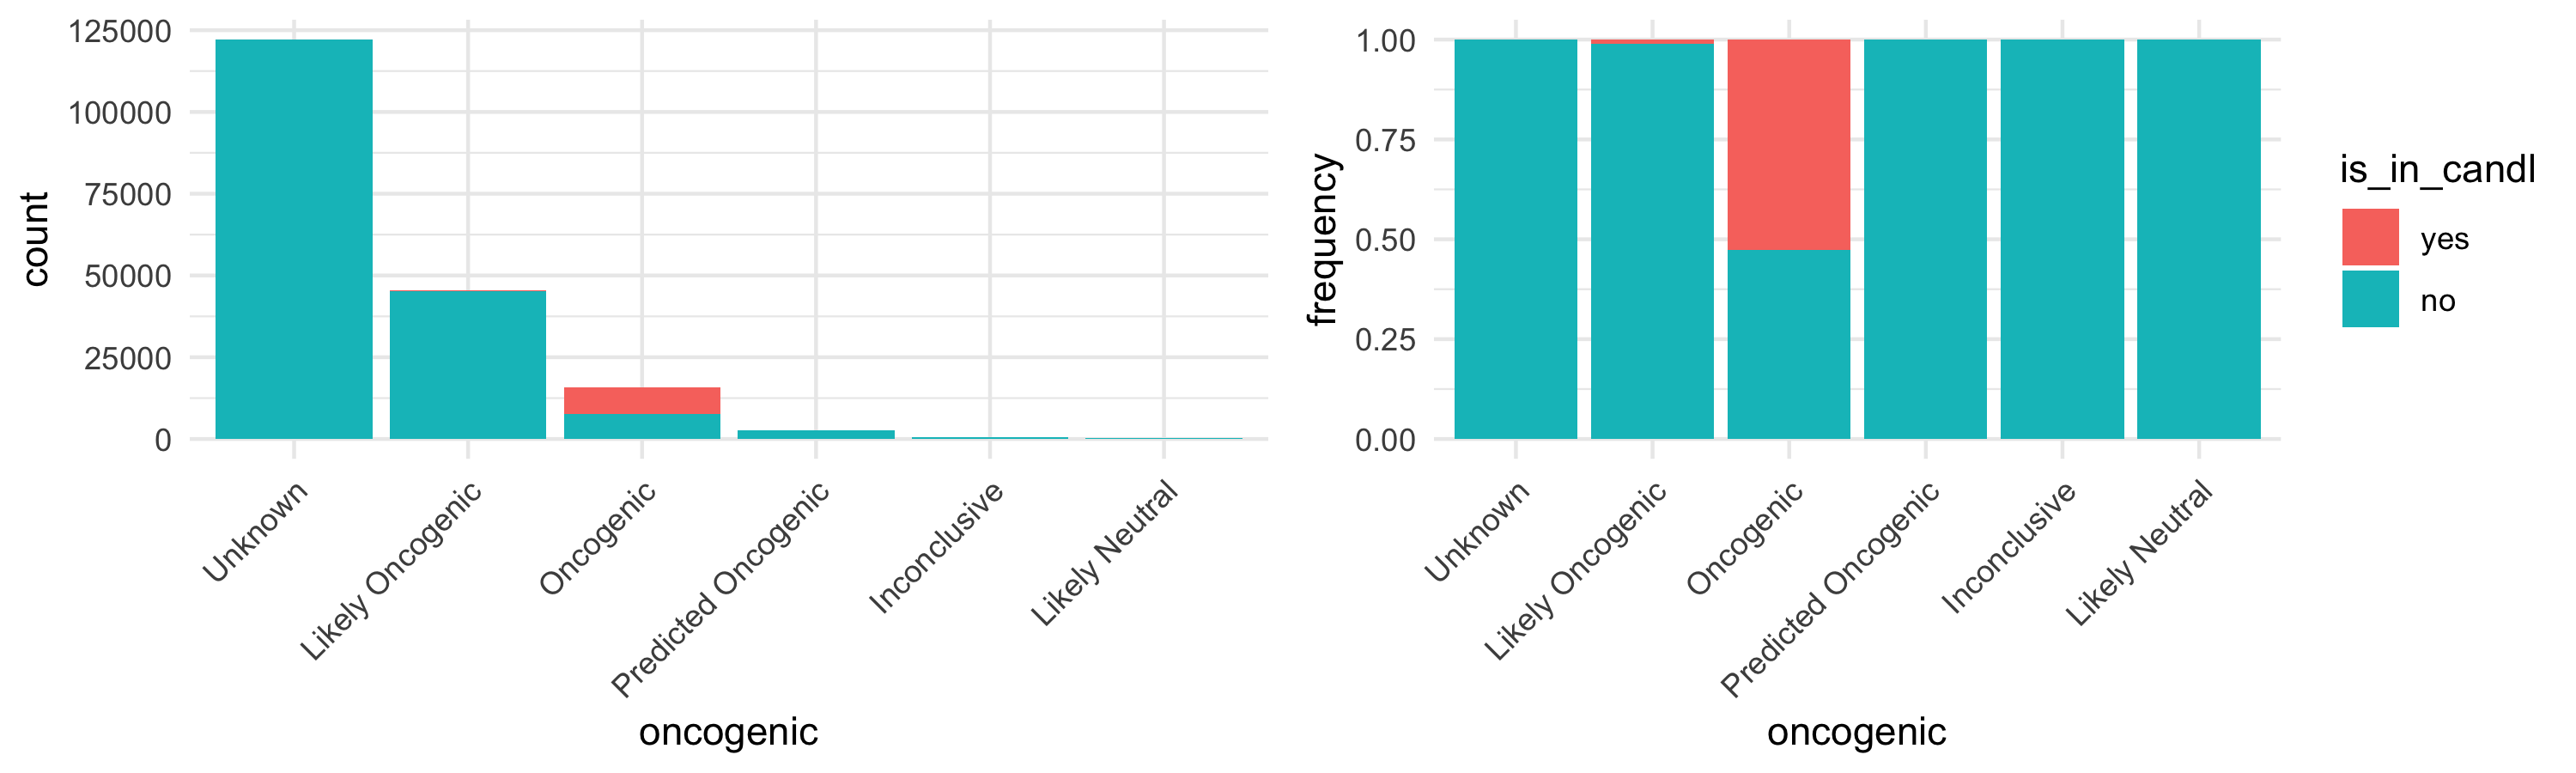

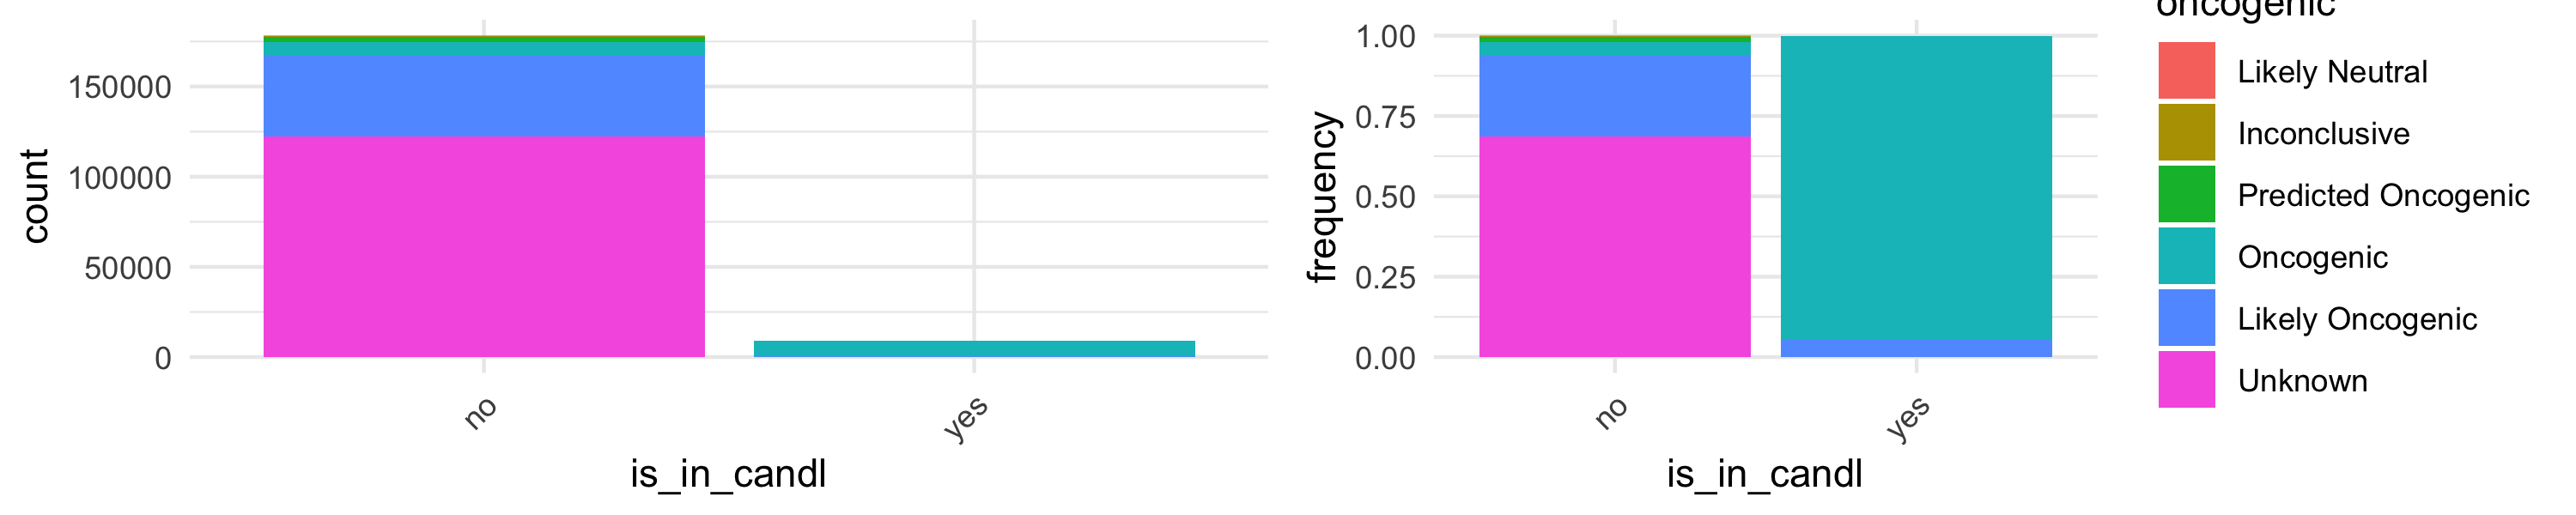

In [37]:
table(impact$is_in_candl)
table(impact$oncogenic)
plot_contingency_table_as_histograms(impact, "oncogenic"  , "is_in_candl", 10, 3)
plot_contingency_table_as_histograms(impact, "is_in_candl", "oncogenic", 10, 2)

Putative drivers not found in OncoKB:

In [38]:
drivers_not_found <- impact[impact$is_in_candl == "yes" &
                            ! impact$oncogenic %in% c("Oncogenic", "Likely Oncogenic", "Predicted Oncogenic"),]
nrow(drivers_not_found)

# only keep the original impact columns
drivers_not_found <- drivers_not_found[1:29]
drivers_not_found$database <- "candl"

unexpected_annotated_mutations <- rbind(unexpected_annotated_mutations, drivers_not_found)

[1] 10

## Study unexpected annotated mutations

### At the row level

In [39]:
nrow(unexpected_annotated_mutations)

[1] 166


  cgi civic candl 
  105    51    10 


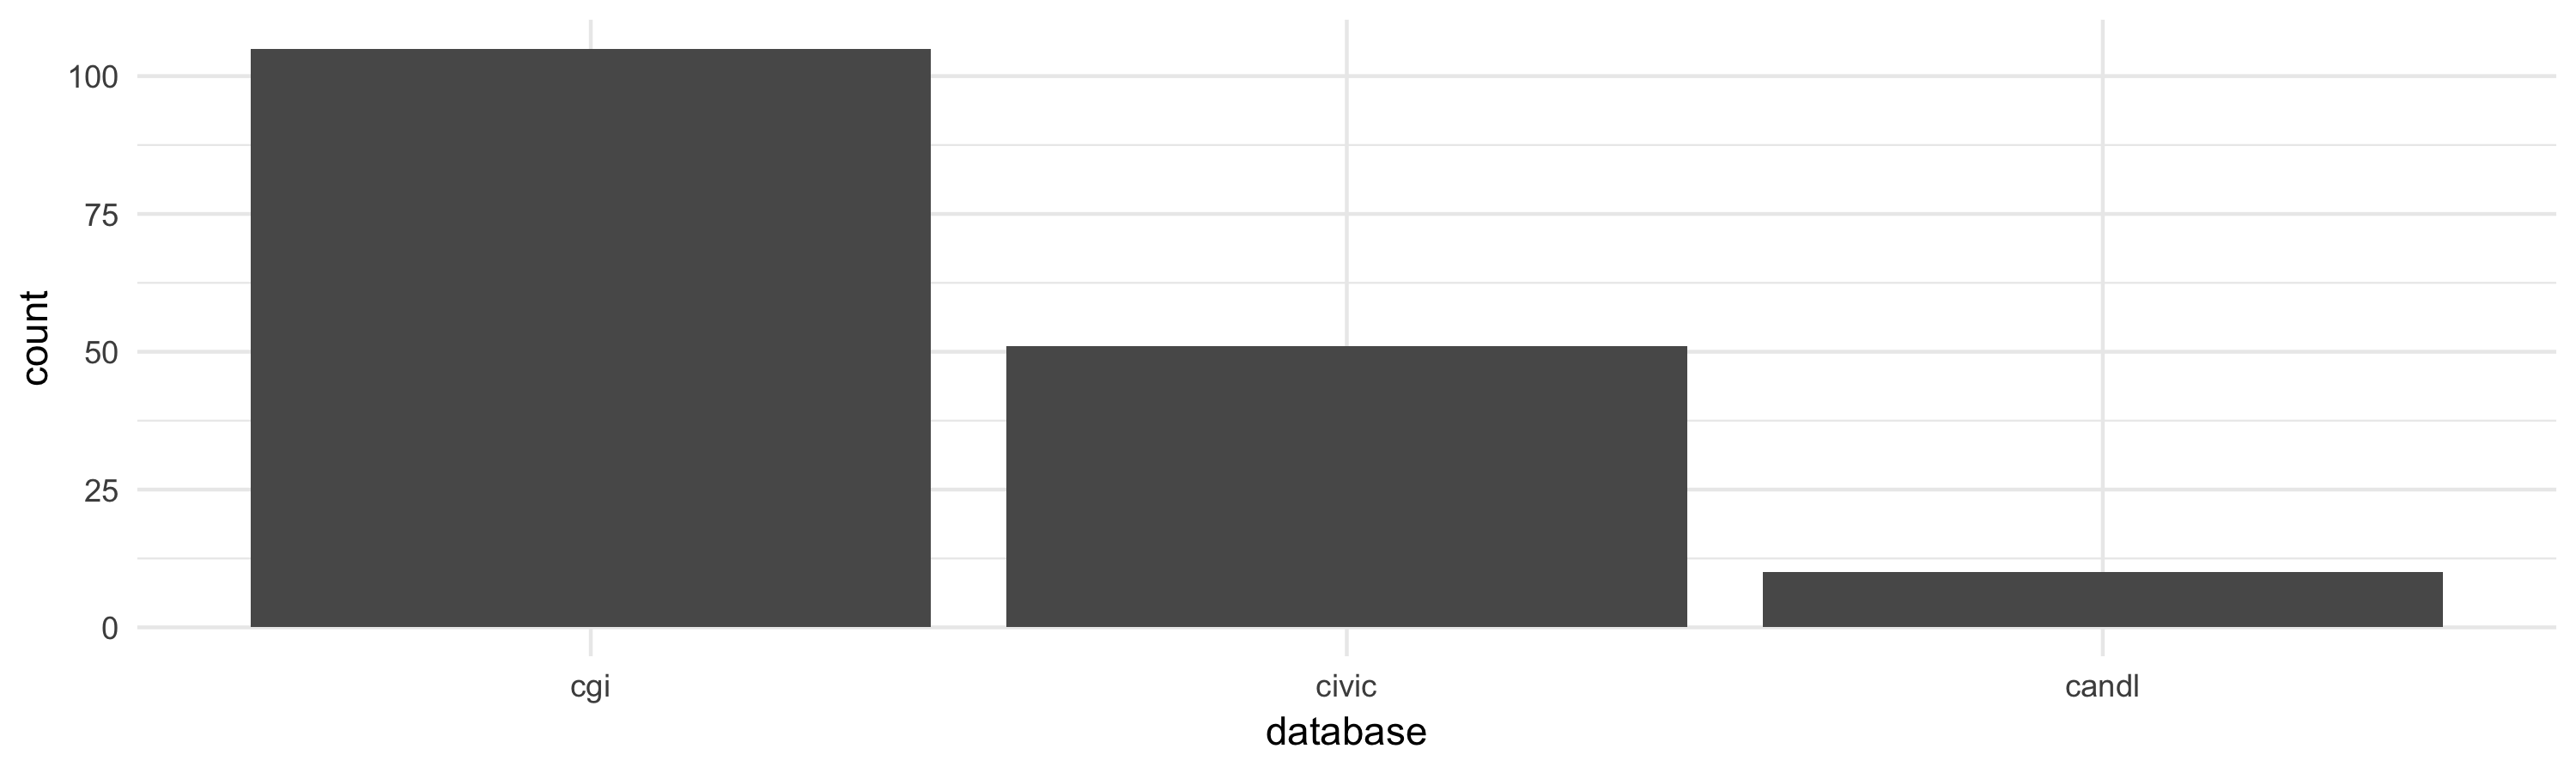

In [40]:
plot_histogram(unexpected_annotated_mutations, "database", print_table = TRUE)

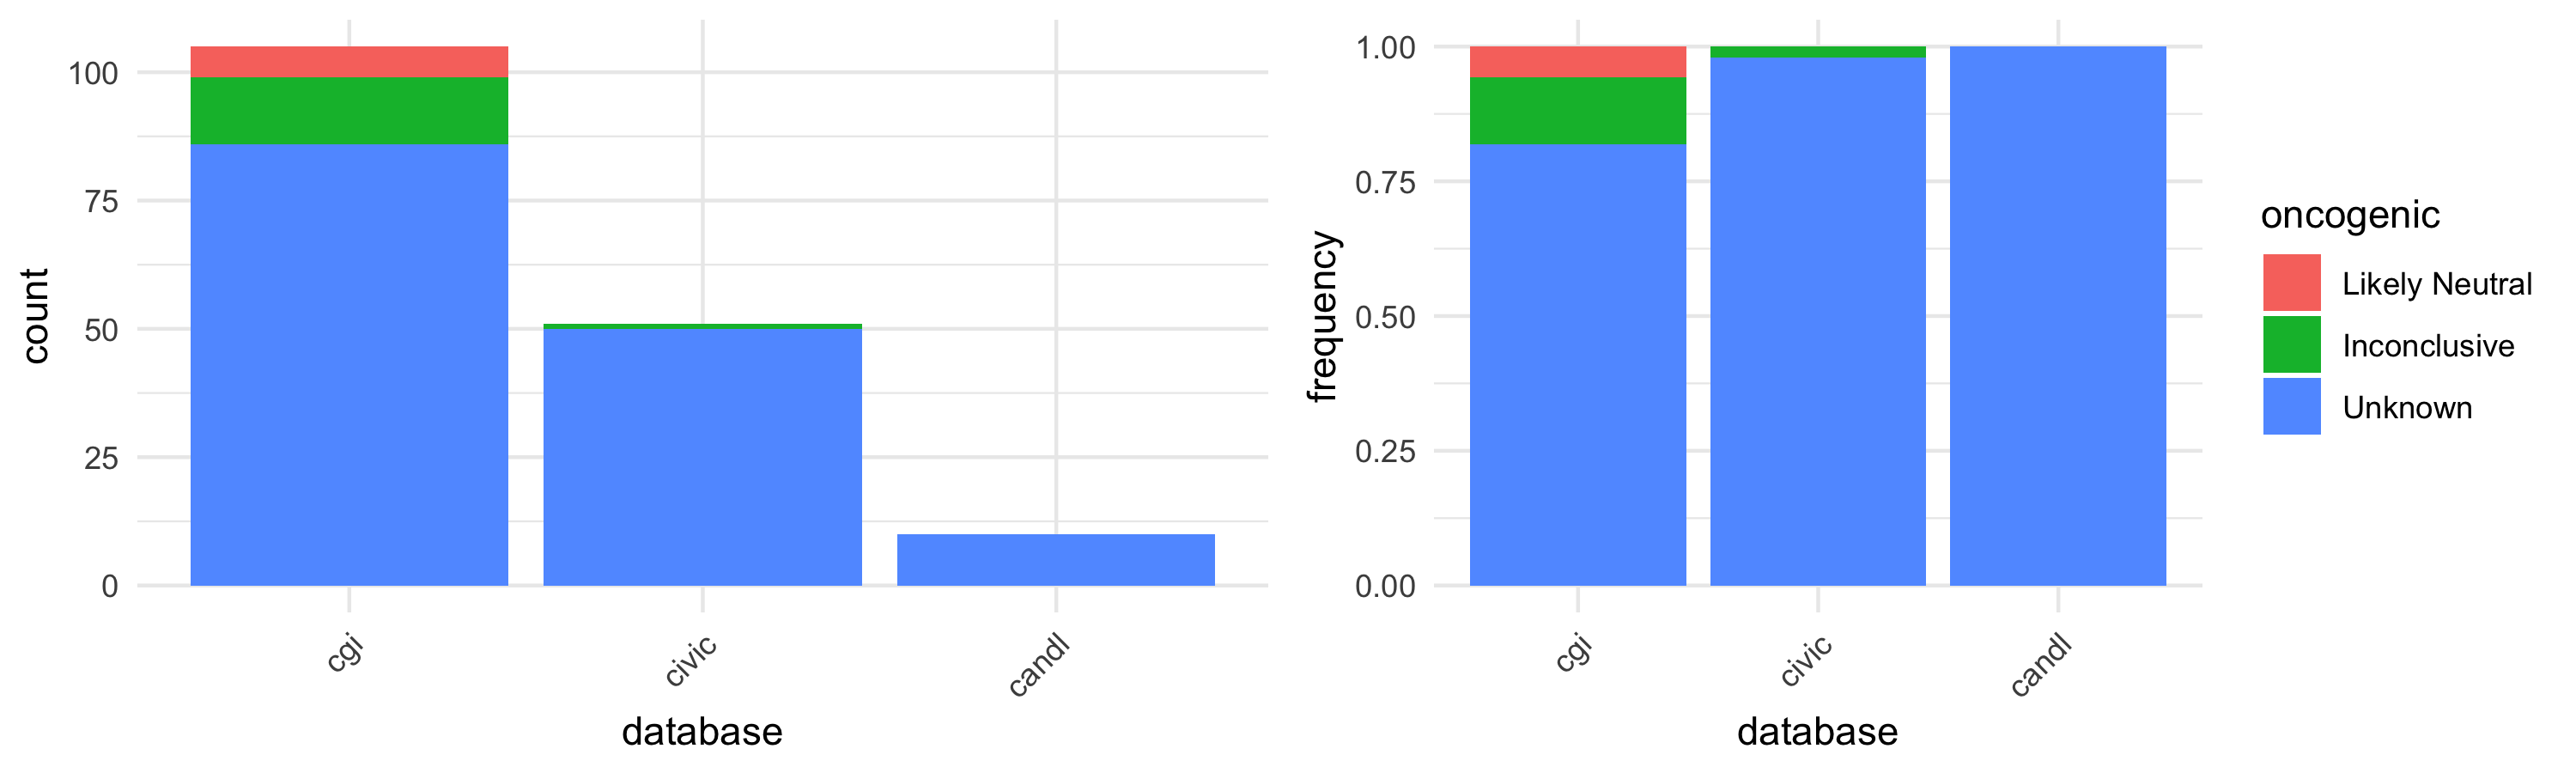

In [41]:
plot_contingency_table_as_histograms(unexpected_annotated_mutations, "database", "oncogenic")

### At the key level

In [42]:
length(unique(unexpected_annotated_mutations$mut_key))

[1] 84

In [43]:
unexpected_annotated_mutations <- as.data.frame(unexpected_annotated_mutations %>%
                                  group_by(mut_key) %>%
                                  mutate(count = n(),
                                         n_database = length(unique(database)),
                                         databases = toString(unique(database))))

summary(unexpected_annotated_mutations$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   3.892   4.000  15.000 

In [44]:
colnames(unexpected_annotated_mutations)

[1] "Hugo_Symbol"          "Chromosome"           "Start_Position"      
 [4] "End_Position"         "Consequence"          "Variant_Type"        
 [7] "Reference_Allele"     "Tumor_Seq_Allele2"    "Tumor_Sample_Barcode"
[10] "cDNA_change"          "HGVSp_Short"          "t_depth"             
[13] "t_vaf"                "t_alt_count"          "n_depth"             
[16] "n_vaf"                "n_alt_count"          "t_ref_plus_count"    
[19] "t_ref_neg_count"      "t_alt_plus_count"     "t_alt_neg_count"     
[22] "confidence_class"     "sample_coverage"      "mut_key"             
[25] "sample_mut_key"       "frequency_in_normals" "is_a_hotspot"        
[28] "is_a_3d_hotspot"      "oncogenic"            "database"            
[31] "count"                "n_database"           "databases"

In [45]:
unexpected_mut_key <- as.data.frame(unexpected_annotated_mutations %>%
                      group_by(mut_key) %>%
                      summarise(n_database = length(unique(database)),
                                databases = toString(unique(database))))

In [46]:
table(unexpected_mut_key$n_database)


 1  2  3 
80  3  1 

In [47]:
table(unexpected_mut_key$databases)


            candl               cgi             civic        civic, cgi 
                3                53                24                 3 
civic, cgi, candl 
                1 


              cgi             civic             candl        civic, cgi 
               53                24                 3                 3 
civic, cgi, candl 
                1 


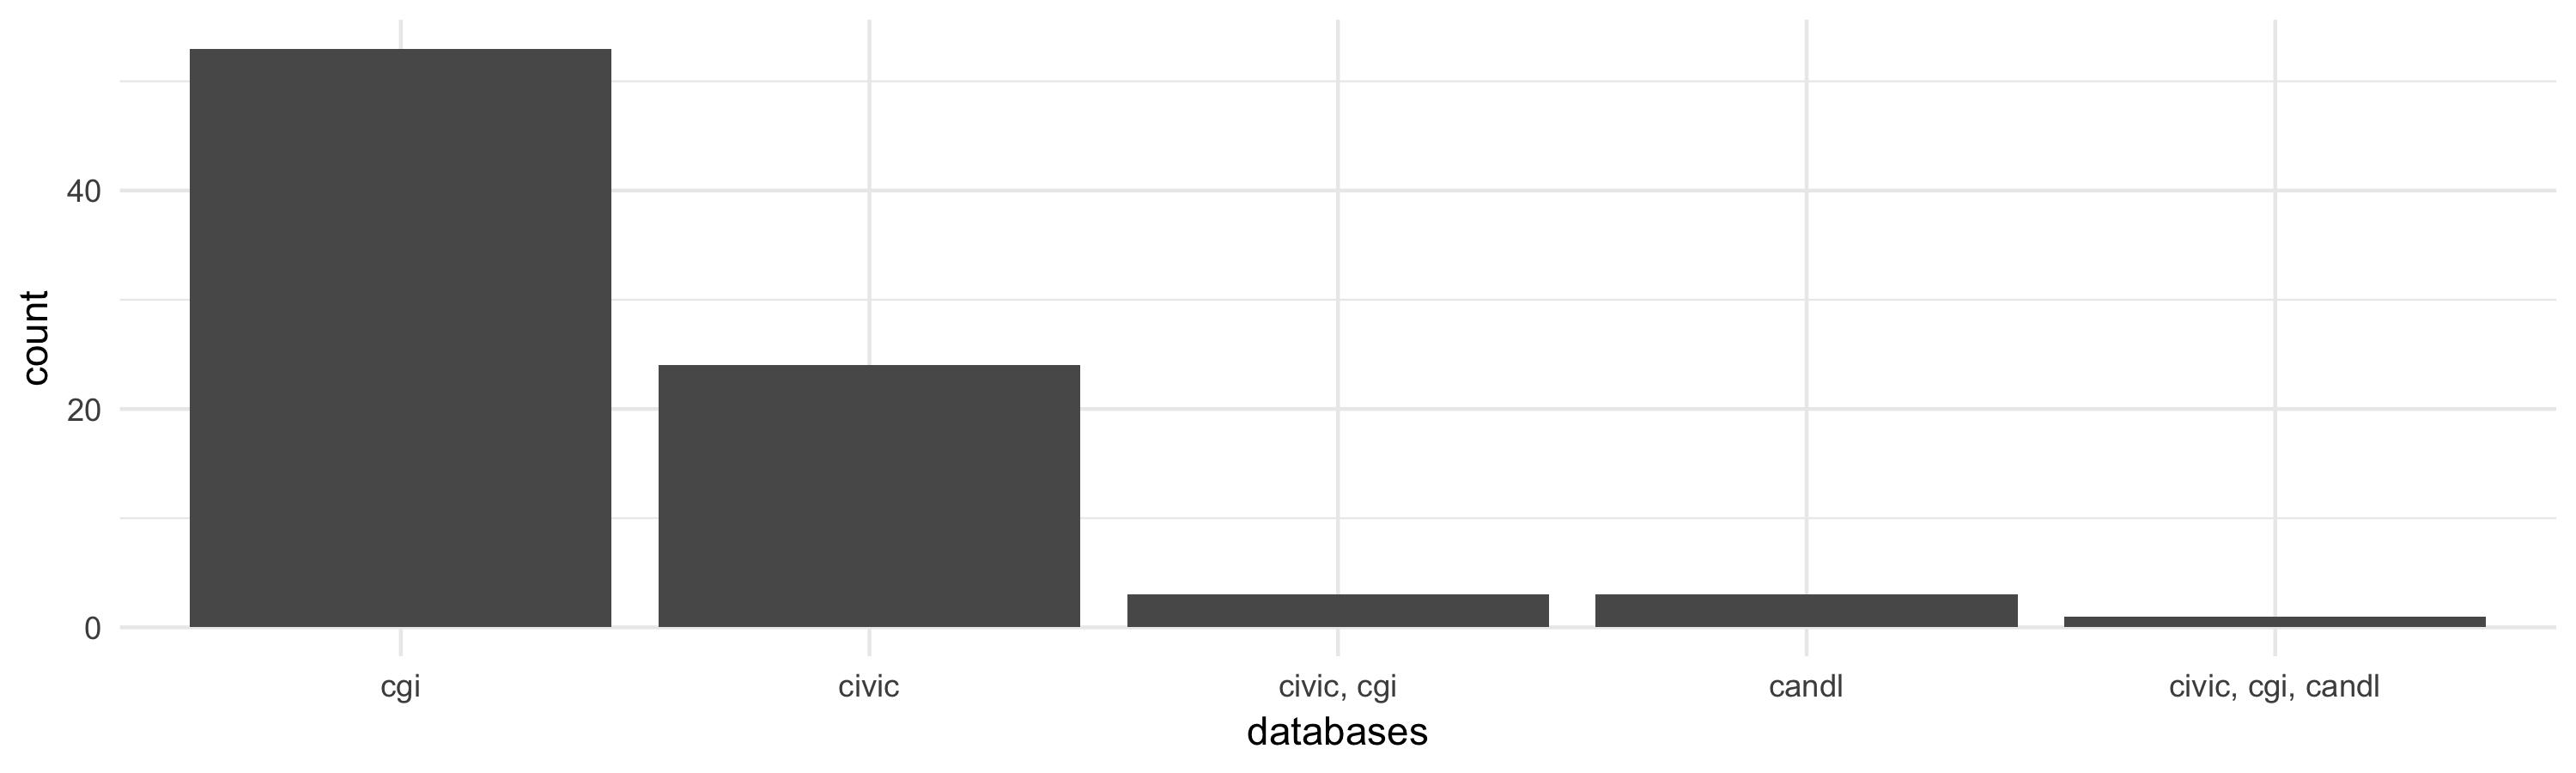

In [48]:
plot_histogram(unexpected_mut_key, "databases", print_table = TRUE)


              cgi             civic civic, cgi, candl        civic, cgi 
               96                42                15                 8 
            candl 
                5 


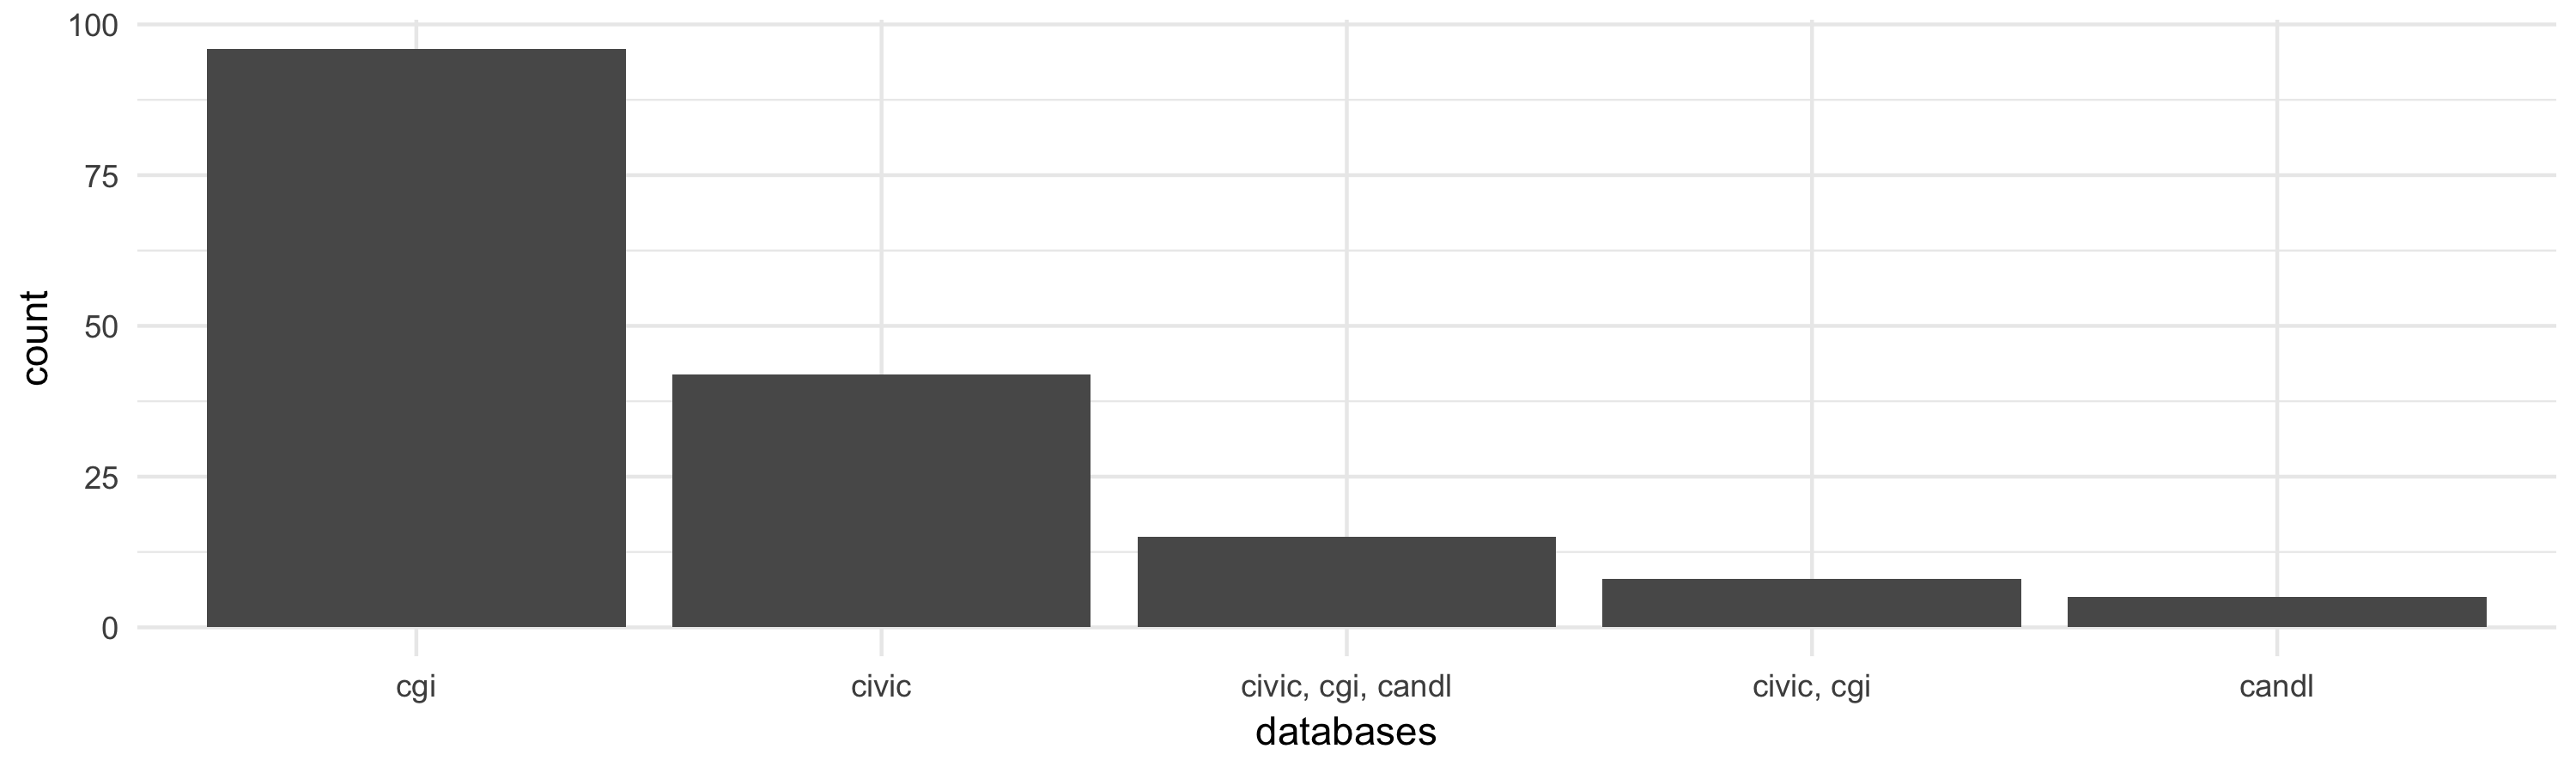

In [49]:
plot_histogram(unexpected_annotated_mutations, "databases", print_table = TRUE)

## Study shared genes and variants

In [101]:
oncokb_genes <- unique(oncokb$Gene)
civic_genes <- unique(civic$gene)
cgi_genes <- unique(cgi$gene)
candl_genes <- unique(candl$Gene)

### Correct Hugo symbols

In [96]:
head(civic_genes[! civic_genes %in% oncokb_genes])

[1] "NT5C2" "XRCC1" "ERCC5" "MTHFR" "GSTP1" "ABCG2"

Every symbol approved.

In [97]:
cgi_genes[! cgi_genes %in% oncokb_genes]

[1] "ABCB4"       "ARHGAP26"    "BAX"         "C15orf23"    "CASP10"     
 [6] "CRBN"        "CSF1R"       "CSF3R"       "DCC"         "DLC1"       
[11] "EIF2C2"      "EPHA2"       "EPHB2"       "FAM175A"     "FAS"        
[16] "FLCN"        "GATA1"       "GATA2"       "GJB2"        "GNAI2"      
[21] "GPC3"        "HERC2"       "IGF2R"       "ING1"        "IRF1"       
[26] "JAGN1"       "KCNJ5"       "KDM5C,KDM5C" "KLF6"        "LZTS1"      
[31] "MAD1L1"      "MCC"         "MLH3"        "MLL3"        "MRE11A"     
[36] "MUTYH"       "OGG1"        "OPCML"       "PDGFRL"      "PPARG"      
[41] "PRKAR1A"     "PTPN12"      "PTPRJ"       "RAD54B"      "RBBP8"      
[46] "RECQL4"      "RNF6"        "SDHA"        "SDHAF2"      "SDHD"       
[51] "SLC22A18"    "TMEM127"     "WRN"         "WT1"         "WWOX"       
[56] "XPC"

|Old Hugo Symbol | New Hugo symbol | HGNC reason     |
| -------------- | --------------- | --------------- |
| C15orf23       |  KNSTRN         | Previous symbol |
| EIF2C2         |  AGO2           | Previous symbol |
| FAM175A        |  ABRAXAS1       | Previous symbol |
| MLL3           |  KMT2C          | Previous symbol |
| MRE11A         |  MRE11          | Previous symbol |

In [98]:
old_Hugo_Symbol = c('C15orf23', 'EIF2C2', 'FAM175A', 'MLL3', 'MRE11A')
new_Hugo_Symbol = c('KNSTRN', 'AGO2', 'ABRAXAS1', 'KMT2C', 'MRE11')

old_symbols <- which(cgi_genes %in% old_Hugo_Symbol)
cgi_genes[old_symbols] <- new_Hugo_Symbol[match(cgi_genes[old_symbols], old_Hugo_Symbol)]

In [99]:
candl_genes[! candl_genes %in% oncokb_genes]

[1] ""            " 8528263\""  " 11726500\"" "CSF3R"       " 23816960\""
 [6] " 15118073\"" " 16187281\"" " 19718025\"" "FRK"         " 17699867\""
[11] " 18955458\"" " 23582185\"" " 19075190\"" " 20570890\"" "LNK"        
[16] "LTK"         "PAK7"        " 23970477\"" " 15928335\"" " 22745105"  
[21] " 15928335"   " 17376864\"" " 15647370\"" "PRKACA"      " 24855271"  
[26] " 25057884"   "ROCK1"       "TRRAP"       "TYK2"

|Old Hugo Symbol | New Hugo symbol | HGNC reason     |
| -------------- | --------------- | --------------- |
| PAK7           |  PAK5           | Previous symbol |
| LNK            |  SH2B3          | Synonyms        |
| 8528263"       |  -              | Unmatched       |
| 11726500"      |  -              | Unmatched       |
| 23816960"      |  -              | Unmatched       |
| 15118073"      |  -              | Unmatched       |
| 16187281"      |  -              | Unmatched       |
| 19718025"      |  -              | Unmatched       |
| 17699867"      |  -              | Unmatched       |
| 18955458"      |  -              | Unmatched       |
| 23582185"      |  -              | Unmatched       |
| 19075190"      |  -              | Unmatched       |
| 20570890"      |  -              | Unmatched       |
| 23970477"      |  -              | Unmatched       |
| 15928335"      |  -              | Unmatched       |
| 17376864"      |  -              | Unmatched       |
| 15647370"      |  -              | Unmatched       |

In [141]:
old_Hugo_Symbol = c('PAK7', 'LNK', '8528263\"', '11726500\"', '23816960\"', '15118073\"', '16187281\"', '19718025\"',
                    '17699867\"', '18955458\"', '23582185\"', '19075190\"', '20570890\"', '23970477\"', '15928335\"',
                    '17376864\"', '15647370\"')
new_Hugo_Symbol = c('PAK5', 'SH2B3', '-','-','-','-','-','-','-','-','-','-','-','-','-','-','-')

old_symbols <- which(candl_genes %in% old_Hugo_Symbol)
candl_genes[old_symbols] <- new_Hugo_Symbol[match(candl_genes[old_symbols], old_Hugo_Symbol)]

### Study genes sharing

In [142]:
length(oncokb_genes)
length(civic_genes)
length(cgi_genes)
length(candl_genes)

[1] 300

[1] 109

[1] 247

[1] 82

In [143]:
genes_list <- as.data.frame(unique(c(oncokb_genes, civic_genes, cgi_genes, candl_genes)))
colnames(genes_list) <- "gene"
nrow(genes_list)

[1] 412

In [152]:
dd <- genes_list %>% mutate(count = gene %in% oncokb_genes +
                                    gene %in% civic_genes  +
                                    gene %in% cgi_genes    +
                                    gene %in% candl_genes)
table(dd$count)


  1   2   3   4 
214 108  52  38 

In [159]:
as.character(dd$gene[dd$count == 4])
as.character(dd$gene[dd$count == 3])
as.character(dd$gene[dd$count == 2])

[1] "ABL1"   "RET"    "KIT"    "CDK4"   "ARAF"   "AKT1"   "IDH2"   "PIK3CA"
 [9] "IDH1"   "KDR"    "KRAS"   "MTOR"   "ESR1"   "NRAS"   "SMO"    "FGFR2" 
[17] "ERBB4"  "FGFR3"  "ERBB3"  "ERBB2"  "BRAF"   "EGFR"   "MET"    "ALK"   
[25] "BTK"    "RAC1"   "JAK1"   "DDR2"   "AKT3"   "JAK3"   "FLT3"   "JAK2"  
[33] "GNAQ"   "MYD88"  "GNAS"   "MAP2K2" "MAP2K1" "PDGFRA"

[1] "STAT3"  "EZH2"   "NPM1"   "IL7R"   "ETV6"   "MEN1"   "CTNNB1" "SF3B1" 
 [9] "NTRK3"  "TSC1"   "AR"     "MAPK1"  "PIK3R1" "FOXL2"  "BRCA2"  "STK11" 
[17] "TP53"   "TSC2"   "RAF1"   "RAD51D" "U2AF1"  "RHOA"   "FGFR4"  "CDKN2A"
[25] "BRCA1"  "RB1"    "ERCC2"  "TERT"   "FGFR1"  "CHEK2"  "NOTCH1" "PTPN11"
[33] "FANCA"  "DNMT3A" "MSH2"   "MYC"    "HRAS"   "PMS2"   "RUNX1"  "CCND3" 
[41] "MLH1"   "B2M"    "GNA11"  "MSH6"   "NF2"    "CARD11" "VHL"    "PTEN"  
[49] "RIT1"   "ROS1"   "PTPRD"  "ATM"

[1] "MAP2K4"   "PMS1"     "CYSLTR2"  "NBN"      "MITF"     "RRAS2"   
  [7] "PTPRT"    "SETD2"    "CREBBP"   "XPO1"     "RAB35"    "PIK3R2"  
 [13] "IGF1R"    "RASA1"    "FOXA1"    "CBL"      "PALB2"    "BCL10"   
 [19] "RHEB"     "NTRK1"    "SDHC"     "SOX9"     "EP300"    "RAD54L"  
 [25] "POLE"     "SDHB"     "BAP1"     "CDK12"    "CDK6"     "AURKA"   
 [31] "RAD50"    "MDM4"     "ERCC4"    "NUP93"    "HNF1A"    "CDKN1B"  
 [37] "TGFBR2"   "AKT2"     "APC"      "ERCC3"    "MDM2"     "CDC73"   
 [43] "TGFBR1"   "PIK3CB"   "AXIN2"    "ELF3"     "KLF4"     "BCL2"    
 [49] "RAD51C"   "MYCN"     "KDM5C"    "CRLF2"    "CDKN2B"   "XRCC2"   
 [55] "FANCC"    "PTCH1"    "CASP8"    "DIS3"     "DICER1"   "FAT1"    
 [61] "SMAD2"    "MPL"      "H3F3A"    "CDH1"     "BARD1"    "NFE2L2"  
 [67] "FOXO1"    "PIM1"     "NF1"      "TCF3"     "SMAD4"    "SMAD3"   
 [73] "PLCG2"    "FBXW7"    "PIK3CD"   "STAT5B"   "SRC"      "FOXP1"   
 [79] "BLM"      "SPOP"     "CEBPA"    "ERRFI1"   "TET2"     "MYOD1"   
 [85] "BMPR1A"   "MEF2B"    "PPP6C"    "WHSC1"    "SHOC2"    "CCND1"   
 [91] "SMARCA4"  "KEAP1"    "SOS1"     "SRSF2"    "PDGFRB"   "HIST1H1C"
 [97] "MAX"      "BRIP1"    "MED12"    "CTLA4"    "FH"       "CTCF"    
[103] "ACVR1"    "PPP2R1A"  "EPAS1"    "GLI1"     "SH2B3"    "CSF3R"